In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [270]:
commune=pd.read_excel('commune.xlsx')
enroll = pd.read_csv("enroll.csv")
quest = pd.read_csv("quest.csv")
industry = pd.read_csv(r"industry.csv")
ordd = pd.read_csv("ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")

In [271]:
quest.rename(columns={"formal_sector_job": "Job is formal"},inplace=True)

In [272]:
study_domain1 = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain1=study_domain1.groupby("quest_id").sum()

In [273]:
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest
first_merge=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])


In [274]:
first_merge['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)

In [275]:
first_merge["dob"] = pd.to_datetime(first_merge["dob"])
first_merge["dob"]

0     1998-08-25
1     1996-09-29
2     1996-05-17
3     1996-11-24
4     1997-07-20
         ...    
245   1994-02-15
246   1990-08-10
247   1993-12-28
248   1992-04-17
249   1993-07-22
Name: dob, Length: 250, dtype: datetime64[ns]

In [276]:
first_merge['applicant_date']=first_merge['created_at'].apply(lambda x: x.split('T')[0])

In [277]:
first_merge["applicant_date"]=pd.to_datetime(first_merge["applicant_date"])

In [278]:
first_merge["age"] = (first_merge["applicant_date"] -first_merge["dob"])

In [279]:
first_merge['age'] = first_merge['age']// np.timedelta64(1,"Y")

In [280]:
first_merge.age.isna().sum()

6

In [281]:
first_merge[first_merge['age']<=1]['age']

25    -1.0
92    -1.0
176    0.0
209    1.0
210   -1.0
219   -1.0
229   -1.0
Name: age, dtype: float64

In [282]:
first_merge[first_merge['age'] <= 1] =first_merge['age'].mean()

In [283]:
first_merge['age'].value_counts()

24.00000    27
23.00000    26
25.00000    24
26.00000    21
28.00000    18
22.00000    16
27.00000    14
29.00000    12
21.00000    10
30.00000     9
33.00000     8
20.00000     7
32.00000     7
34.00000     7
26.47541     7
31.00000     7
37.00000     6
40.00000     4
38.00000     3
44.00000     2
35.00000     1
19.00000     1
18.00000     1
43.00000     1
46.00000     1
50.00000     1
39.00000     1
48.00000     1
45.00000     1
Name: age, dtype: int64

In [284]:
technologyy = pd.get_dummies(data=technology[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technologyyy=technologyy.groupby("quest_id").sum()
technologyyy

,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other
quest_id,,,,,,,,,,,,
905ddcf2-ce95-11eb-9a92-7c67a234f601,0,1,0,0,0,0,0,0,1,0,0,0
905e2608-ce95-11eb-809f-7c67a234f601,1,1,1,1,1,0,0,1,0,1,0,0
905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,1,1,1,0,1,0,0,0,0
905e73fd-ce95-11eb-a7b0-7c67a234f601,1,0,0,0,0,1,0,0,0,0,0,0
905e9b27-ce95-11eb-9c37-7c67a234f601,0,1,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
906b3c84-ce95-11eb-8c2a-7c67a234f601,0,1,0,0,0,0,0,0,0,0,0,0
906b3c85-ce95-11eb-9b87-7c67a234f601,1,1,1,0,1,0,1,0,0,0,0,0
906b3c86-ce95-11eb-b6a7-7c67a234f601,0,1,0,0,0,0,1,1,0,1,0,0


In [285]:
transaction['Payed'] = 'Yes'
ordd['Payed'] = 'Yes'
x = transaction.loc[:,['Payed','user_id','created_at']]
y = ordd.loc[:,['Payed','user_id','created_at']]
trans_ord= pd.concat([x,y],axis=0)
trans_ord= trans_ord.rename(columns={'created_at': 'Payment_Date'})
trans_ord.head(2)

,Payed,user_id,Payment_Date
0,Yes,40976440,2021-03-08T05:08:50.832Z
1,Yes,41179271,2021-03-08T17:26:35.841Z


In [286]:
first_merge.head(2)

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE,applicant_date,age
0,0.0,male,1998-08-25 00:00:00,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN,2021-02-14 00:00:00,22.0
1,1.0,female,1996-09-29 00:00:00,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,2021-02-16 00:00:00,24.0


In [287]:
scnd_merge=pd.merge(enroll,ordd, how = 'left',on = ['quest_id'] )

In [288]:
scnd_merge.head(2)

,Unnamed: 0_x,created_at_x,expiry_date,user_id_x,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,...,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,Payed
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,...,Entwodiksyon Nan Syans Done,1100636.0,0.0,0.0,False,testing_course_1,6516246.0,NaN,Complete,Yes
1,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,...,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,Yes


In [289]:
transaction.head(2)

,Unnamed: 0,created_at,modified_at,user_id,course_id,transaction_id,Payed
0,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952,Yes
1,1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613,4644270160,Yes


In [290]:
third_tab=pd.merge(left=scnd_merge,right=transaction, how = 'left', on=['course_id'])

In [291]:
third_tab.head(1)

,Unnamed: 0_x,created_at_x,expiry_date,user_id_x,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,...,coupon_id,affiliate_referral_code,status,Payed_x,Unnamed: 0,created_at,modified_at,user_id,transaction_id,Payed_y
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,...,6516246.0,NaN,Complete,Yes,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,4641281952,Yes


In [292]:
first_merge.head(1)

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE,applicant_date,age
0,0.0,male,1998-08-25 00:00:00,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN,2021-02-14 00:00:00,22.0


In [293]:
study_domain1.head(1)

,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
quest_id,,,,,,,,,
905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1


In [294]:
study_merge=pd.merge(left=first_merge,right=study_domain1, how = 'left', on=['quest_id'])

In [295]:
study_merge.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,age,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,0.0,male,1998-08-25 00:00:00,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,female,1996-09-29 00:00:00,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,male,1996-05-17 00:00:00,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,male,1996-11-24 00:00:00,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,24.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.0,male,1997-07-20 00:00:00,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [296]:
study_tech=pd.merge(left=study_merge,right=technologyyy, how = 'left', on=['quest_id'])

In [297]:
study_tech.head(2)

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y
0,0.0,male,1998-08-25 00:00:00,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,female,1996-09-29 00:00:00,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [298]:
study_tech.shape

(250, 45)

In [299]:
enroll.rename(columns={"created_at": "enroll_date"},inplace=True)
enroll.head(2)

,Unnamed: 0,enroll_date,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN


In [300]:
enroll_merge=pd.merge(left=study_tech,right=enroll, how = 'left', on=['quest_id'])

In [301]:
#enroll_merge.head(2)

In [302]:
enroll_merge.head(2)

,Unnamed: 0_x,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at
0,0.0,male,1998-08-25 00:00:00,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,Entwodiksyon Nan Syans Done,1047613.0,0.0,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z
1,1.0,female,1996-09-29 00:00:00,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
enroll_merge['is_enroll'] = enroll_merge['enroll_date'].apply(lambda x: 'No' if(str(x) == 'nan') else 'Yes')

In [304]:
enroll_merge[['is_enroll']].value_counts()

is_enroll
No           148
Yes          102
dtype: int64

In [305]:
final_merge=pd.merge(left=enroll_merge,right=trans_ord, how = 'left', on=['user_id'])

In [306]:
final_merge[['Payed']].value_counts()

Payed
Yes      65
dtype: int64

In [307]:
#final_merge.Payed = final_merge["Payed"].fillna(value ='No',inplace=True)
#final_merge.Payed=final_merge.Payed.fillna(value='No',inplace=True)
final_merge['Payed'] = final_merge['Payed'].apply(lambda x: 'No' if(str(x) == 'nan') else 'Yes')

In [308]:
final_merge

,Unnamed: 0_x,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,is_enroll,Payed,Payment_Date
0,0.0,male,1998-08-25 00:00:00,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z,Yes,No,NaN
1,1.0,female,1996-09-29 00:00:00,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
2,2.0,male,1996-05-17 00:00:00,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,NaN,False,False,False,2021-02-20T21:20:37.814Z,2021-03-03T23:00:11.000Z,2021-03-09T13:57:49.729Z,Yes,Yes,2021-03-03T23:00:11.974Z
3,3.0,male,1996-11-24 00:00:00,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
4,4.0,male,1997-07-20 00:00:00,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245.0,male,1994-02-15 00:00:00,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,NaN,False,False,False,2021-03-02T18:45:27.034Z,2021-03-02T18:53:20.000Z,2021-03-13T05:43:58.022Z,Yes,Yes,2021-03-02T18:53:20.759Z
246,246.0,male,1990-08-10 00:00:00,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
247,247.0,male,1993-12-28 00:00:00,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,NaN,False,False,False,2021-03-14T15:34:56.007Z,2021-03-14T15:34:39.768Z,2021-03-14T17:30:53.379Z,Yes,Yes,2021-03-14T15:34:35.014Z
248,248.0,male,1992-04-17 00:00:00,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,NaN,False,False,False,2021-03-08T19:10:36.694Z,2021-03-08T19:06:32.000Z,2021-03-14T16:28:07.992Z,Yes,Yes,2021-03-08T19:06:32.837Z


In [309]:
final_merge.shape

(250, 62)

In [310]:
final_merge.head()

,Unnamed: 0_x,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,is_enroll,Payed,Payment_Date
0,0.0,male,1998-08-25 00:00:00,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z,Yes,No,NaN
1,1.0,female,1996-09-29 00:00:00,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
2,2.0,male,1996-05-17 00:00:00,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,NaN,False,False,False,2021-02-20T21:20:37.814Z,2021-03-03T23:00:11.000Z,2021-03-09T13:57:49.729Z,Yes,Yes,2021-03-03T23:00:11.974Z
3,3.0,male,1996-11-24 00:00:00,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
4,4.0,male,1997-07-20 00:00:00,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN


In [311]:
final_merge=final_merge[['quest_id','gender','age','commune','Commune_en', 'Commune_FR', 'Commune_Id', 'Departement','applicant_date','enroll_date','is_enroll','education_level'
                         ,'hear_AA_1','after_AA','Payed','Accounting', 'Computer Science', 'Economics', 'Electrical Engineering',
       'Law', 'Management', 'Medicine', 'Statistics', 'Bash', 'Excel', 'Git', 'Java', 'JavaScript', 'PHP',
       'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA','Job is formal','have_computer_home','internet_at_home','Payment_Date']]

In [312]:
final_merge.shape

(250, 38)

In [313]:
final_merge.head(4)

,quest_id,gender,age,commune,Commune_en,Commune_FR,Commune_Id,Departement,applicant_date,enroll_date,...,PHP,PowerBI or Tableau,Python,R,SQL,VBA,Job is formal,have_computer_home,internet_at_home,Payment_Date
0,905dc006-ce95-11eb-b2f9-7c67a234f601,male,22.0,HT0111,NaN,NaN,NaN,NaN,2021-02-14 00:00:00,2021-02-14T23:15:19.500Z,...,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,unknown,NaN
1,905ddcf2-ce95-11eb-9a92-7c67a234f601,female,24.0,HT0111,Port-au-Prince,Port-au-Prince,HT0111,West,2021-02-16 00:00:00,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,unknown,Yes,Yes,NaN
2,905e2608-ce95-11eb-809f-7c67a234f601,male,24.0,HT0111,Port-au-Prince,Port-au-Prince,HT0111,West,2021-02-16 00:00:00,2021-02-20T21:20:37.450Z,...,0.0,0.0,1.0,0.0,1.0,0.0,unknown,Yes,Yes,2021-03-03T23:00:11.974Z
3,905e4cf5-ce95-11eb-96a9-7c67a234f601,male,24.0,HT0111,Port-au-Prince,Port-au-Prince,HT0111,West,2021-02-16 00:00:00,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,unknown,Yes,Yes,NaN


In [318]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   quest_id                250 non-null    object 
 1   gender                  250 non-null    object 
 2   age                     244 non-null    float64
 3   commune                 250 non-null    object 
 4   Commune_en              248 non-null    object 
 5   Commune_FR              248 non-null    object 
 6   Commune_Id              248 non-null    object 
 7   Departement             248 non-null    object 
 8   applicant_date          250 non-null    object 
 9   enroll_date             102 non-null    object 
 10  is_enroll               250 non-null    object 
 11  education_level         250 non-null    object 
 12  hear_AA_1               250 non-null    object 
 13  after_AA                250 non-null    object 
 14  Payed                   250 non-null    ob

# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

###  1. How many observations and variables are there in the dataset
 

In [319]:
# here your codes
print('the observation of row :',final_merge.shape[0])
print('the observation of columns:',final_merge.shape[1])

the observation of row : 250
the observation of columns: 38


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

In [320]:
#the average for the observations 
W_average=final_merge['age'].mean()
print('the average of whole age observations:', np.round(W_average), 'years old')
male_average=final_merge[final_merge['gender']== 'male'].age.mean()
print('the average of whole male observations:', np.round(male_average,2))
female_average=final_merge[final_merge['gender']== 'female'].age.mean()
print('the average of whole female observations:', np.round(female_average))

#the variance for the observations 

variance=final_merge['age'].var()
print('the variance of whole age observations:', np.round(variance,1))
male_variance=final_merge[final_merge['gender']== 'male'].age.var()
print('the variance of whole male observations:', np.round(male_variance,1))
female_variance=final_merge[final_merge['gender']== 'female'].age.var()
print('the variance of whole female observations:', np.round(female_variance,1))


the average of whole age observations: 27.0 years old
the average of whole male observations: 27.51
the average of whole female observations: 26.0
the variance of whole age observations: 30.5
the variance of whole male observations: 31.5
the variance of whole female observations: 30.0


In [321]:
#the kurtosis for the observations 
kts=final_merge['age'].kurtosis()
print('the kurtosis of whole age observations:', np.round(kurtosis,1))
male_kurtosis=final_merge[final_merge['gender']== 'male'].age.kurtosis()
print('the kurtosis of whole male observations:', np.round(male_kurtosis,1))
female_kurtosis=final_merge[final_merge['gender']== 'female'].age.kurtosis()
print('the variance of whole male observations:', np.round(male_kurtosis,1))

#the skewness for the observations 

skw=final_merge['age'].skew()
print('the skewness of whole age observations:', np.round(skw,1))
skewness_male=final_merge[final_merge['gender']== 'male'].age.skew()
print('the skewness of whole male observations:', np.round(skewness_male,1))
skewness_female=final_merge[final_merge['gender']== 'male'].age.skew()
print('the skewness of whole female observations:', np.round(skewness_female,1))

the kurtosis of whole age observations: 2.5
the kurtosis of whole male observations: 2.2
the variance of whole male observations: 2.2
the skewness of whole age observations: 1.5
the skewness of whole male observations: 1.4
the skewness of whole female observations: 1.4


### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

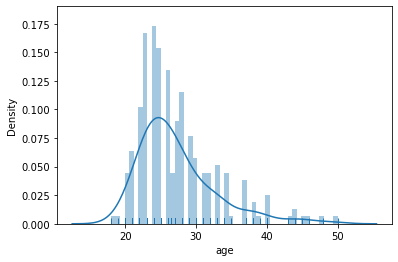

In [322]:
sns.distplot(final_merge['age'], bins=50, kde=True, rug=True)

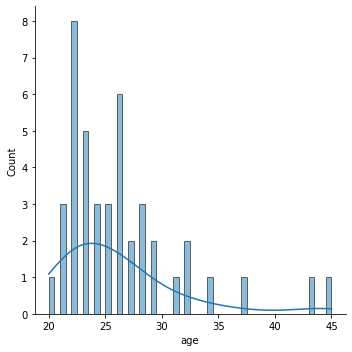

In [323]:
sns.displot(final_merge[final_merge['gender']== 'female'].age,bins=50 ,kde = True)

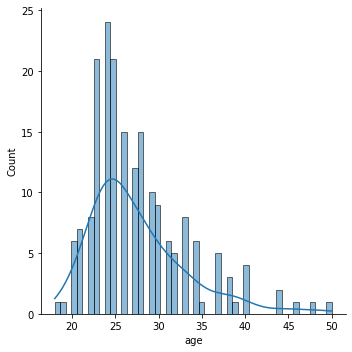

In [324]:
sns.displot(final_merge[final_merge['gender']== 'male'].age, bins =50 ,kde = True)

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [325]:
# H0 : Mu = 24 
# H1 : Mu != 24
from scipy.stats import wilcoxon
stat, p = wilcoxon(final_merge.age - 24)
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
	print('ho mu=24 (fail to reject H0)')
else:
	print('h1 mu!= 24 (reject H0)')

Statistics=4060.50, p=0.00
h1 mu!= 24 (reject H0)


### 5. Calculate the average age of participants for each communication channel

In [326]:
#here your codes
participant_avg_age=( final_merge['age'].groupby(by= final_merge['hear_AA_1']).mean())


### 6. Display an age boxplot for each communication channel

Text(0.5, 1.0, 'the boxplot of each communication channel')

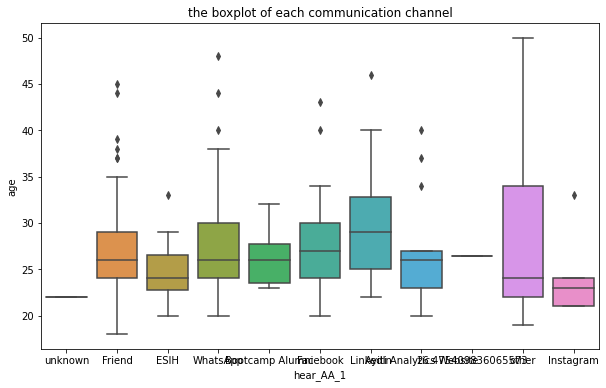

In [327]:
#here your codes
plt.figure(figsize=(10,6))
sns.boxplot(data=final_merge,x="hear_AA_1",y="age")
plt.title('the boxplot of each communication channel')

### 7 .Is there a significant age difference between these groups

In [328]:
#here your codes

In [329]:
Facebook_age = final_merge[final_merge['hear_AA_1'] == 'Facebook']['age'].values
Unknown_age = final_merge[final_merge['hear_AA_1'] == 'unknown']['age'].values
Friend_age = final_merge[final_merge['hear_AA_1'] == 'Friend']['age'].values
ESIH_age = final_merge[final_merge['hear_AA_1'] == 'ESIH']['age'].values
WhatsApp_age = final_merge[final_merge['hear_AA_1'] == 'WhatsApp']['age'].values
Bootcamp_Alumni_age = final_merge[final_merge['hear_AA_1'] == 'Bootcamp Alumni']['age'].values
LinkedIn_age = final_merge[final_merge['hear_AA_1'] == 'LinkedIn']['age'].values
Ayiti_Analytics_Website_age = final_merge[final_merge['hear_AA_1'] == 'Ayiti Analytics Website']['age'].values
other_age = final_merge[final_merge['hear_AA_1'] == 'other']['age'].values
Instagram_age = final_merge[final_merge['hear_AA_1'] == 'Instagram']['age'].values

In [330]:

stat, p = f_oneway(Facebook_age,Unknown_age,Friend_age,ESIH_age,WhatsApp_age,Bootcamp_Alumni_age,LinkedIn_age,Ayiti_Analytics_Website_age,other_age,Instagram_age)
print("p-values:", p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: nan
Hypothesis Accepted


In [331]:
#here your codes
# Ho : There is no difference between the mean of these groups
# h1 : There is a difference between the mean of these groups

ccList = list(final_merge["hear_AA_1"].unique())
cat = [final_merge[final_merge["hear_AA_1"] == i].age.dropna() for i in ccList]

stat, p = f_oneway(Facebook_age,Unknown_age,Friend_age,ESIH_age,WhatsApp_age,Bootcamp_Alumni_age,LinkedIn_age,Ayiti_Analytics_Website_age,other_age,Instagram_age)
print(p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

nan
Hypothesis Accepted


### 8.Plan a BA strategy for each communication channel regarding the age group

In [332]:
participant_avg_age.to_frame()

,age
hear_AA_1,
26.475409836065573,26.475410
Ayiti Analytics Website,27.000000
Bootcamp Alumni,26.285714
ESIH,24.875000
Facebook,27.486486
Friend,27.000000
Instagram,24.400000
LinkedIn,30.214286
WhatsApp,27.836066


### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [333]:
#here your codes
prob_obsv = final_merge[final_merge["gender"]=="female"]["hear_AA_1"]
prob_obsv.value_counts(normalize=1)


Friend                     0.244444
WhatsApp                   0.177778
Bootcamp Alumni            0.177778
Facebook                   0.133333
Ayiti Analytics Website    0.088889
ESIH                       0.088889
other                      0.044444
Instagram                  0.022222
LinkedIn                   0.022222
Name: hear_AA_1, dtype: float64

### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [334]:
#here your codes
prob_obsv2 = final_merge[final_merge["gender"]=="male"]["hear_AA_1"]
prob_obsv2.value_counts(normalize=1)



Friend                     0.277778
WhatsApp                   0.277778
Facebook                   0.161616
LinkedIn                   0.070707
ESIH                       0.065657
Ayiti Analytics Website    0.055556
other                      0.035354
Bootcamp Alumni            0.030303
Instagram                  0.020202
unknown                    0.005051
Name: hear_AA_1, dtype: float64

### 11. Deduce the probability of being a woman knowing each communication channel

In [335]:
#here your codes


### 13. Deduce the probability of being a woman knowing each communication channel

In [336]:
# here your codes

### 14. Deduce the probability of being a man knowing each communication channel

In [337]:
#here your codes


### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

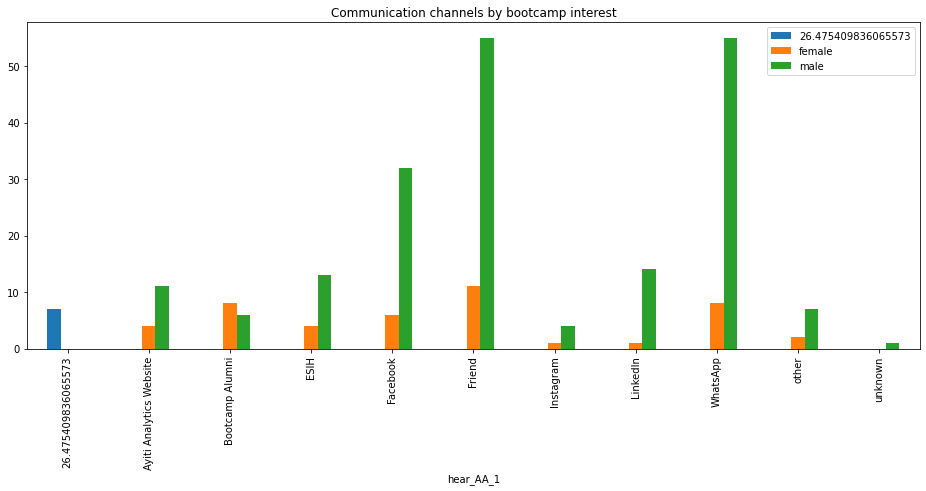

We do the test of khi-square  hear_AA_1 and gender.
1.3952919273024965e-46 is inferior than 0.05
we can say that  the variables hear_AA_1 and gender are statistically significant.


In [351]:
#here 
def Presentation(data=final_merge, col1="", col2="", graph_title ="Gender vs Communication Channels", l=(12,6)):
    g_cc = pd.crosstab(data[col1], final_merge[col2], margins = True)
    g_cc.iloc[:-1,:-1].plot.bar(figsize=l)
    plt.title(graph_title)
    plt.legend()
    plt.show()
    chi2, pval, dof, expected = chi2_contingency(g_cc[g_cc.All>5].iloc[:-1,:-1])
    print(f"We do the test of khi-square  {col1} and {col2}.")
    if pval<0.05:
        print(f"{pval} is inferior than 0.05")
        print(f"we can say that  the variables {col1} and {col2} are statistically significant.")
    else:
        print(f"{pval} is bigger than 0.05")
        print(f"we can say that  the variables \n{col1} and {col2} is not statistically significant.")

Presentation(col1="hear_AA_1", col2="gender", graph_title ="Communication channels by bootcamp interest", l=(16,6))

### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

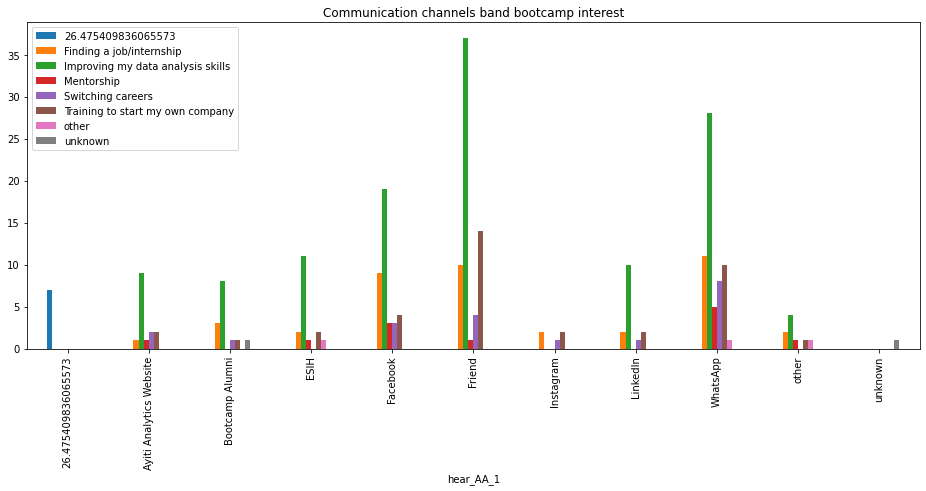

We do the test of khi-square  hear_AA_1 and after_AA.
1.604580669159394e-33 is inferior than 0.05
we can say that  the variables hear_AA_1 and after_AA are statistically significant.


In [352]:
Presentation(col1="hear_AA_1", col2="after_AA", graph_title ="Communication channels band bootcamp interest", l=(16,6))


### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

In [55]:
#here your codes

### 18.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender

In [56]:
# here your codes

### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [57]:
# here your codes

### Based on these findings, propose strategies to increase our sales?

In [58]:
#here your codes